<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/VGG19_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Top-5 performance in Computer Vision Competition: Use of Data Augmentation, Transfer Learning, and Standard CNN Architectures

> Semant Jain, PhD
> semant@gmail.com

### Summary
> In deep learning, training large neural networks can be assisted through data augmentation. In this strategy, the diversity of data available for training the models is increased -- without collecting new data -- but through cropping, padding, and horizontal flipping existing images.

> ImageNet is a large database used in visual object recognition software research with the following features:
+ Contains over 14 million images have been hand annotated
+ Contains over 1 million images with bounding boxes
+ Contains over 20,000 categories with each category consisting of several hundred images
> As recently as 2017, the top-10 entrants in ImageNet annual contests were able to achieve a classification accuracy of over 95%.

> In deep learning, for analyzing images, Convolutional Neural Networks are start of the art models for image classification, segmentation, and object detection. Commonly used architectures include: VGG Net, ResNet Dense Net, Inception Net, and Xception Net.
+ VGG Net stacks convolutional layers with increasing filter sizes but each are of size 3 x 3. Two common architectures VGG16 and VGG19 have 16 and 19 layers respectively.
+ ResNet, with 152 layers, was made feasible through residual connections which also minimize vanishing and exploding gradient problems
+ In DenseNet, all preceding layers to a given layer are concatenated and given as input. This permits use of smaller filter counts.
+ While RestNet created deeper networks, Inception Net makes the network wider by making parallel connections of multiple layers having different filters and then concatenating all those parallel paths to pass to the next layers. 

> In this project, the VGG 19 architecture was selected with the initial five layers ImageNet weights frozen. For classification, two dense layers with dropout were added. To build the binary classifier, a public dataset from Kaggle was used with:
+ Training was done on 1000 cat and 1000 dog images
+ Testing was done on 400 cat and 400 dog images

> **Conclusion**: Even with a small dataset to finetune the VGG architectures, in just 10 epochs (30 minutues on GPU), the training and testing accuracy was over 95% which would be a top-5 finish in the ImageNet competition.

### Contents
+ Setting up
+ CNN Model
+ Transfer Learning: VGG19 model
+ Visualization


### Libraries
+ Datetime
+ Kaggle
+ Matplotlib
+ Numpy

# 1. Setting up

### Importing libraries

In [1]:
pip install kaggle

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from keras import applications
from keras import backend as K
from keras import optimizers

from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPool2D
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

### Setting up environment

In [0]:
! mkdir /root/.kaggle
! echo '{"username":"semantjain", "key":"b1202159c3f0d361bab1aa84102f6978"}' > /root/.kaggle/kaggle.json

! chmod 600 /root/.kaggle/kaggle.json
!rm -rf train/
!rm -rf data/ 

### Downloading data

In [4]:
# Just run the cells and the data will be automatically downloaded
# Left columns ">" displays Table of Contenst, Code Snippets, Files sections
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 97% 529M/544M [00:03<00:00, 107MB/s]
100% 544M/544M [00:03<00:00, 157MB/s]
 98% 267M/271M [00:02<00:00, 151MB/s]
100% 271M/271M [00:02<00:00, 139MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 99.7MB/s]


In [5]:
# Unzip files but since they are going to create new folders
!unzip train.zip

Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflating: train/cat.10017.jpg     
  inflating: train/cat.10018.jpg     
  inflatin

### Making directories

In [0]:
!mkdir data

!mkdir data/train
!mkdir data/train/cats
!mkdir data/train/dogs

!mkdir data/validation
!mkdir data/validation/cats
!mkdir data/validation/dogs



```
# This is formatted as code
```

### Splitting data - Test, train

In [0]:
!bash -c "mv train/cat.{0..999}.jpg data/train/cats"
!bash -c "mv train/dog.{0..999}.jpg data/train/dogs"

In [0]:
# 400 images
!bash -c "mv train/cat.{1000..1399}.jpg data/validation/cats"
!bash -c "mv train/dog.{1000..1399}.jpg data/validation/dogs"

# 2. CNN Model

### Setting channels location

In [9]:
print(K.image_data_format())
K.set_image_data_format('channels_first')
print(K.image_data_format())

channels_last
channels_first


### Architecture

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(3, 150, 150))) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) 
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = 'rmsprop',
              metrics = ['accuracy'])












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Data Augmentation

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True) 

train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size = (150, 150), 
                                                    batch_size = 16,
                                                    class_mode = 'binary') 

validation_datagen = ImageDataGenerator(rescale = 1./255) 

validation_generator = validation_datagen.flow_from_directory('data/validation',
                                                    target_size = (150, 150), 
                                                    batch_size = 16,
                                                    class_mode = 'binary') 

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


### Execution

In [12]:
history1 = model.fit_generator(train_generator,
                    epochs = 10, 
                    steps_per_epoch = 125,
                    validation_data = validation_generator,
                    validation_steps = 800)
                    # validation_steps = 200, #800
                    # shuffle = True) # All the test images

model.save_weights('Try_01.h5')



Epoch 1/10
125/125 [==============================] - 53s 424ms/step - loss: 0.7174 - acc: 0.5190 - val_loss: 0.6813 - val_acc: 0.5900
Epoch 2/10
125/125 [==============================] - 47s 375ms/step - loss: 0.6711 - acc: 0.6080 - val_loss: 0.6892 - val_acc: 0.6025
Epoch 3/10
125/125 [==============================] - 47s 374ms/step - loss: 0.6339 - acc: 0.6515 - val_loss: 0.6375 - val_acc: 0.6262
Epoch 4/10
125/125 [==============================] - 47s 378ms/step - loss: 0.6087 - acc: 0.6775 - val_loss: 0.6538 - val_acc: 0.6338
Epoch 5/10
125/125 [==============================] - 47s 372ms/step - loss: 0.5824 - acc: 0.6965 - val_loss: 0.5721 - val_acc: 0.6887
Epoch 6/10
125/125 [==============================] - 46s 371ms/step - loss: 0.5654 - acc: 0.7120 - val_loss: 0.5934 - val_acc: 0.6813
Epoch 7/10
125/125 [==============================] - 47s 372ms/step - loss: 0.5319 - acc: 0.7410 - val_loss: 0.5426 - val_acc: 0.7087
Epoch 8/10
125/125 [==============================] -

# 3. Transfer Learning

### Parameters

In [0]:
img_width, img_height = 256, 256
train_data_dir = "data/train"
validation_data_dir = "data/validation"
nb_train_samples = 4125
nb_validation_samples = 466
batch_size = 16
epochs = 10 # 50
 
# Cats and Dogs - just 2 classes
output_num_classes = 2

### Architecture
+ Standard archiecture: VGG19
+ ImageNet weights

In [14]:
print(K.image_data_format())
K.set_image_data_format('channels_last')
print(K.image_data_format())

model = applications.VGG19(weights = "imagenet",  
                          include_top = False, 
                           input_shape = (img_width, img_height, 3))

channels_first
channels_last
80142336/80134624 [==============================] - 1s 0us/step


In [0]:
#model.summary()

### Freezing convolutional layers

In [0]:
for layer in model.layers[:5]:
  layer.trainable = False

In [17]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

### Add Custom (Dense) layers

In [0]:
x = model.output
x = Flatten()(x) 
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
predictions = Dense(output_num_classes, activation = 'softmax')(x)

### Compilation

In [19]:
model_final = Model(input = model.input, output = predictions)

model_final.compile(loss = "categorical_crossentropy", # Softmax
                  optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9),  # Can specify LR. Momentum can accelerate/dampen movement of optimization. Can look into Keras optimizers for other optimiers
                  metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


### Data Augmentation

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical") 

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size = batch_size,
                                                    class_mode = "categorical") 

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Check point

In [0]:
checkpoint = ModelCheckpoint("vgg.h5", 
                             monitor = "val_acc",
                             save_best_only = True,
                             save_weights_only = False, 
                             mode = 'auto',
                             verbose = 1,
                             period = 1) 

early = EarlyStopping(monitor = 'val_acc',
                      min_delta = 0, 
                      patience = 10,
                      verbose = 1,
                      mode = 'auto')

In [22]:
history = model_final.fit_generator(train_generator,
                          samples_per_epoch = nb_train_samples,
                          epochs = epochs,
                          validation_data = validation_generator,
                          nb_val_samples = nb_validation_samples,
                          callbacks = [checkpoint, early])

model_final.save_weights('Try_TL_02.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=10, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=257, validation_steps=466)`
  


Epoch 1/10
257/257 [==============================] - 193s 750ms/step - loss: 0.6585 - acc: 0.6109 - val_loss: 0.4938 - val_acc: 0.7717

Epoch 00001: val_acc improved from -inf to 0.77173, saving model to vgg.h5
Epoch 2/10
257/257 [==============================] - 189s 737ms/step - loss: 0.4279 - acc: 0.7977 - val_loss: 0.2648 - val_acc: 0.8892

Epoch 00002: val_acc improved from 0.77173 to 0.88922, saving model to vgg.h5
Epoch 3/10
257/257 [==============================] - 190s 738ms/step - loss: 0.2477 - acc: 0.8996 - val_loss: 0.1635 - val_acc: 0.9315

Epoch 00003: val_acc improved from 0.88922 to 0.93146, saving model to vgg.h5
Epoch 4/10
257/257 [==============================] - 190s 739ms/step - loss: 0.1788 - acc: 0.9239 - val_loss: 0.1519 - val_acc: 0.9351

Epoch 00004: val_acc improved from 0.93146 to 0.93509, saving model to vgg.h5
Epoch 5/10
257/257 [==============================] - 191s 744ms/step - loss: 0.1455 - acc: 0.9404 - val_loss: 0.1394 - val_acc: 0.9410

Epoch 

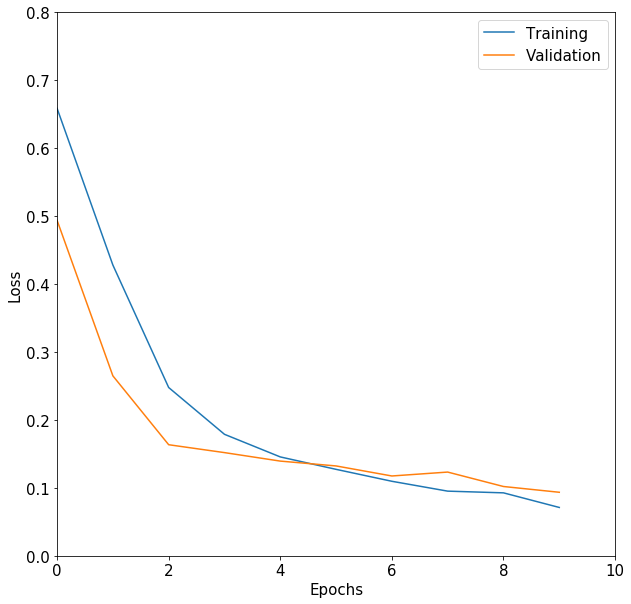

In [33]:
plt.figure (figsize = (10,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(0, 10)
plt.ylim(0, 0.8)
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'], fontsize = 15)
plt.savefig('CE_ML_Project_10_01_Loss.jpeg')
plt.show()

# 4. Visualization

### Sample check on some cat / dog images

In [0]:
!mkdir data/test/
!mkdir data/test/dogs

In [0]:
!bash -c "mv train/dog.{1400..1409}.jpg data/test/dogs"

In [28]:
predict_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

predict_generator = predict_datagen.flow_from_directory("data/test",
                                                    target_size = (img_height, img_width),
                                                    class_mode = "categorical") 

model_final.predict_generator(predict_generator, steps = 1)

Found 10 images belonging to 1 classes.


array([[1.0355423e-02, 9.8964453e-01],
       [2.0161325e-08, 1.0000000e+00],
       [8.0523995e-04, 9.9919480e-01],
       [5.4027612e-07, 9.9999940e-01],
       [8.1583858e-03, 9.9184167e-01],
       [7.5429851e-01, 2.4570152e-01],
       [1.5929255e-04, 9.9984074e-01],
       [1.4964147e-08, 1.0000000e+00],
       [1.4235053e-03, 9.9857652e-01],
       [1.3176177e-03, 9.9868232e-01]], dtype=float32)

In [29]:
!bash -c "mv train/dog.{1400..1401}.jpg data/test/dogs"
predict_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest')

predict_generator = predict_datagen.flow_from_directory("data/test",
                                                    target_size = (img_height, img_width),
                                                    class_mode = "categorical") 

df = model_final.predict_generator(predict_generator, steps = 1)

mv: cannot stat 'train/dog.1400.jpg': No such file or directory
mv: cannot stat 'train/dog.1401.jpg': No such file or directory
Found 10 images belonging to 1 classes.


### Helper function: Pic status

In [0]:
def Status(a):
  if (df[a][0] > 0.5):
    return(f"This is a Cat")
  else:
    return(f"This is a Dog")    

### Test images

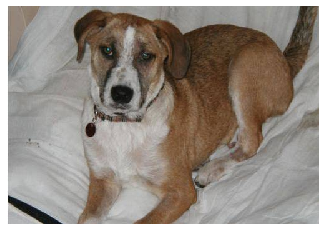

This is a Dog


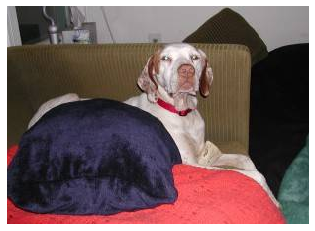

This is a Dog


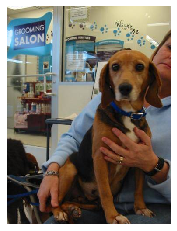

This is a Cat


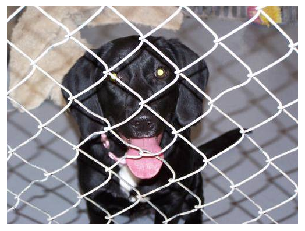

This is a Dog


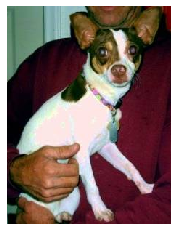

This is a Dog


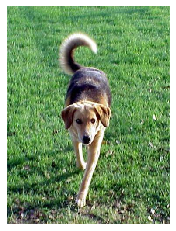

This is a Dog


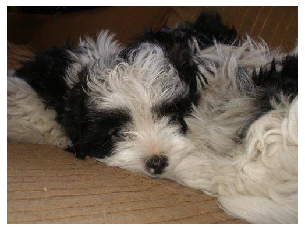

This is a Dog


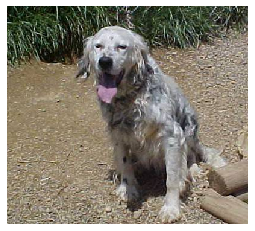

This is a Dog


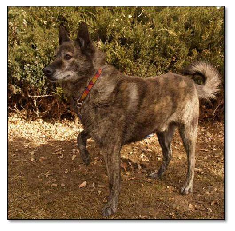

This is a Dog


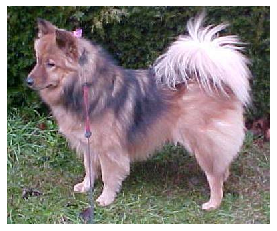

This is a Dog


In [48]:
img = cv2.imread("/content/data/test/dogs/dog.1400.jpg"); img0 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1401.jpg"); img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1402.jpg"); img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1403.jpg"); img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1404.jpg"); img4 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1405.jpg"); img5 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1406.jpg"); img6 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1407.jpg"); img7 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1408.jpg"); img8 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.imread("/content/data/test/dogs/dog.1409.jpg"); img9 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off'); plt.imshow(img0); plt.show(); print(Status(0))
plt.axis('off'); plt.imshow(img1); plt.show(); print(Status(1))
plt.axis('off'); plt.imshow(img2); plt.show(); print(Status(2))
plt.axis('off'); plt.imshow(img3); plt.show(); print(Status(3))
plt.axis('off'); plt.imshow(img4); plt.show(); print(Status(4))
plt.axis('off'); plt.imshow(img5); plt.show(); print(Status(5))
plt.axis('off'); plt.imshow(img6); plt.show(); print(Status(6))
plt.axis('off'); plt.imshow(img7); plt.show(); print(Status(7))
plt.axis('off'); plt.imshow(img8); plt.show(); print(Status(8))
plt.axis('off'); plt.imshow(img9); plt.show(); print(Status(9))